This is just to understand cross correlation better and illustrate it on a minimal example

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import math
from IPython.display import clear_output
from time import sleep

The kernel is the representation of the rules in Game of Life

In [15]:
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

This would not work for even sized kernels:

In [16]:
def step(a):
    padded_a = np.pad(a, (pad_rows, pad_cols))
    c = np.empty_like(a)
    for i in range(a_n_rows):
        for j in range(a_n_cols):
            c[i,j] = np.sum(kernel*padded_a[i:i+k_n_rows, j:j+k_n_cols])
    
    b = np.empty_like(a)
    b = (c==3) | (c==2) & a
    b = b.astype(np.uint8)
    
    return b

In [17]:
def draw(array):
    n, m = array.shape

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, cmap='Greens',
               alpha=0.7,
               vmin=0,
               vmax=1,
               interpolation='none',
               origin='upper',
               extent=[0, m, 0, n])

The Glider:

In [40]:
frames = 5

In [50]:
glider = ['010', '001', '111']
upper_left = [0,0]

In [51]:
a = np.zeros(16, dtype=int).reshape(4,4)

In [52]:
for i, row in enumerate(glider):
    a[upper_left[0] + i, upper_left[1]:upper_left[1]+len(row)] = [int(el) for el in row]
a

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 0],
       [0, 0, 0, 0]])

In [44]:
a_n_rows, a_n_cols = a.shape
k_n_rows, k_n_cols = kernel.shape
pad_rows = np.int((k_n_rows-1)/2)
pad_cols = np.int((k_n_cols-1)/2)

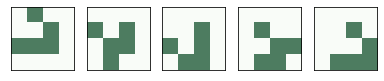

In [45]:
plt.figure(figsize=(12, 4))
for i in range(1, frames+1):
    plt.subplot(math.ceil(frames/9), 9, i)
    draw(a)
    a = step(a)

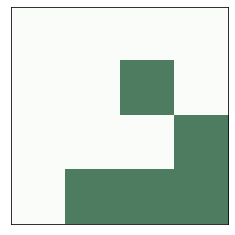

In [53]:
plt.figure()
for i in range(frames-1):
    draw(a)
    plt.show()
    sleep(1)
    a = step(a)
    clear_output(wait=True)
draw(a)
plt.show()

A random starting configuration:

In [18]:
a = np.random.randint(2, size=(100, 100), dtype=np.uint8)
print(a)

[[0 1 0 ... 0 1 0]
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [1 0 1 ... 0 0 0]]


In [23]:
frames = 20

In [24]:
a_n_rows, a_n_cols = a.shape
k_n_rows, k_n_cols = kernel.shape
pad_rows = np.int((k_n_rows-1)/2)
pad_cols = np.int((k_n_cols-1)/2)

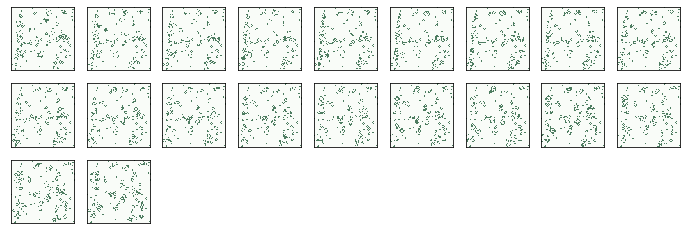

In [26]:
plt.figure(figsize=(12, 4))
for i in range(1, frames+1):
    plt.subplot(math.ceil(frames/9), 9, i)
    draw(a)
    a = step(a)

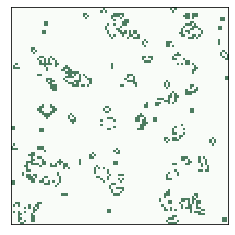

In [27]:
plt.figure(figsize=(12, 4))
for i in range(frames-1):
    draw(a)
    plt.show()
    sleep(0.1)
    a = step(a)
    clear_output(wait=True)
draw(a)
plt.show()